CLASSIFICATION MODELING (SUPERVISED LEARNING)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


PREPROCESSING

- Understanding the data


([<matplotlib.patches.Wedge at 0x1e96a2730b0>,
 [Text(-0.062170487413935493, 1.0982416994881927, ''),
  Text(0.062170321584051766, -1.0982417088756626, '')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.8%'),
  Text(0.03391108450039187, -0.5990409321139978, '48.2%')])

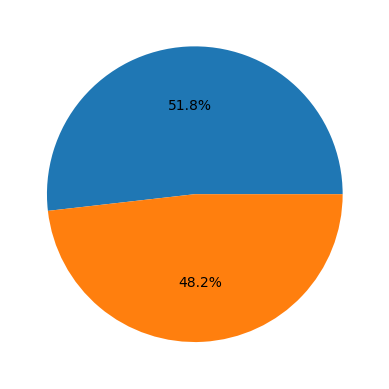

In [3]:
plt.scatter(df['gender'], df['reading score'], color= 'red')

sizes = df['gender'].value_counts(sort=1)
plt.pie(sizes, autopct='%1.1f%%')

In [4]:
#dropping irrelevant data
df.isnull().sum()

#wanting to drop lunch, lets see if it has any effect on data
df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

# print(df['race/ethnicity'].unique())
# print(df['parental level of education'].unique())

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


Insight: a major difference in the scores can be seen between the free and standard lunch, so lunch column will not be dropped

- Converting non numeric data to numeric data for training

In [5]:
df = pd.read_csv("StudentsPerformance.csv")

#converting columns with 2 type of values
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})

#converting columns with more than 2 type of values(one hot encoding)
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)
dummy_cols = df.select_dtypes(include='bool').columns
df[dummy_cols] = df[dummy_cols].astype(int)

df.head()
#now the data has been converted into binary values

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,72,72,74,1,0,0,0,1,0,0,0,0
1,0,1,1,69,90,88,0,1,0,0,0,0,0,1,0
2,0,1,0,90,95,93,1,0,0,0,0,0,1,0,0
3,1,0,0,47,57,44,0,0,0,0,0,0,0,0,0
4,1,1,0,76,78,75,0,1,0,0,0,0,0,1,0


In [6]:
#Creating a new column

df['pass'] = (
    (df['math score'] > df['math score'].mean()) &
    (df['writing score'] > df['writing score'].mean() - 10) &
    (df['reading score'] > df['reading score'].mean() - 10)
).astype(int)

df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,pass
0,0,1,0,72,72,74,1,0,0,0,1,0,0,0,0,1
1,0,1,1,69,90,88,0,1,0,0,0,0,0,1,0,1
2,0,1,0,90,95,93,1,0,0,0,0,0,1,0,0,1
3,1,0,0,47,57,44,0,0,0,0,0,0,0,0,0,0
4,1,1,0,76,78,75,0,1,0,0,0,0,0,1,0,1


- Preparing the data (x and y vals that will go in our ML model)

In [7]:
y = df['pass']
X = df.drop(columns=['pass'])

- Splitting data

In [8]:
from sklearn.model_selection import train_test_split

#here test_size = 0.4 means i want 40% of my data used for testing and 60% used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20) #20 meaning i want to train my model on the same(fixed) data for now, i dot want it to change
# print(X_train)
print(X_test)

     gender  lunch  test preparation course  math score  reading score  \
890       0      1                        1          86             85   
694       0      1                        0          49             63   
798       1      1                        0          69             60   
147       1      0                        0          73             68   
858       1      1                        1          52             49   
..      ...    ...                      ...         ...            ...   
150       1      1                        1          62             67   
279       1      0                        0          73             56   
544       0      1                        0          64             63   
568       1      0                        0          63             48   
911       0      1                        0          69             84   

     writing score  race/ethnicity_group B  race/ethnicity_group C  \
890             91                       

MODEL TRAINING (LOGISTIC REGRESSION)

In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)           #fitting is training

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

TESTING THE MODEL

In [10]:
lr_prediction_test = lr_model.predict(X_test)
lr_prediction_test

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1])

EVALUATION: 

- ACCURACY

In [11]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, lr_prediction_test))   #y_test are the actual answers

Accuracy:  0.915


- FINDING PRECISION

In [12]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, lr_prediction_test)
print("Precision: ", precision)

Precision:  0.8823529411764706


- CALCULATING CONFUSION MATRIX

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_prediction_test, labels=[0,1])
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[93 12]
 [ 5 90]]


MODEL TRAINING (DECISION TREE)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

- PREDICTION

In [15]:
dtc_prediction_test = dtc.predict(X_test)
dtc_prediction_test

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

- ACCURACY

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, dtc_prediction_test)) 

Accuracy:  0.995


- PRECISION

In [17]:
print("Precision: ", precision_score(y_test, dtc_prediction_test))

Precision:  1.0


- CONFUSION MATRIX

In [18]:
print("Confusion matrix:\n", confusion_matrix(y_test, dtc_prediction_test))

Confusion matrix:
 [[105   0]
 [  1  94]]


- Testing overfitting

In [19]:
print(dtc.get_depth())
print(dtc.get_n_leaves())

3
5


- FEATURE IMPORTANCE

In [20]:
features = pd.DataFrame(dtc.feature_importances_, index=X.columns)

features.head(16)

,0
gender,0.000000
lunch,0.000000
test preparation course,0.000000
math score,0.927602
reading score,0.014647
writing score,0.057751
race/ethnicity_group B,0.000000
race/ethnicity_group C,0.000000
race/ethnicity_group D,0.000000
race/ethnicity_group E,0.000000


INSIGHT: 

- From above calculated feature importance, math, writing and reading score are directly related to student's pass/fail it can be seen math score has the highest importance.
- Students who completed their test preparation course(1) mostly passed.
- Gender and Ethnicity had a relatively lower impact on the outcome. 
- Those with better lunch (standard type) tend to have better scores in subjects.

- Accuracy and Prediction wise, Decision Tree performed better than Logistic Regression on the same preprocessed data